# リッジ回帰

In [6]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [10]:
class RidgeRegression:
    def __init__(self, lambda_=1.):
        self.lambda_ = lambda_
        self.w_ = None
    
    def fit(self, X, t):
        Xtil = np.c_[np.ones(X.shape[0]), X]
        c = np.eye(Xtil.shape[1])
        A = np.dot(Xtil.T, Xtil) + self.lambda_ * c
        b = np.dot(Xtil.T, t)
        self.w_ = np.linalg.solve(A, b)
        
    def predict(self, X):
        Xtil = np.c_[np.ones(X.shape[0]), X]
        return np.dot(Xtil, self.w_)

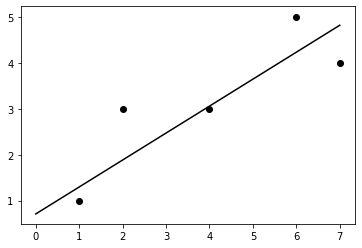

In [11]:
x = np.array([1, 2, 4, 6, 7])
y = np.array([1, 3, 3, 5, 4])
model = RidgeRegression(1.)
model.fit(x, y)
b, a = model.w_

plt.scatter(x, y, color='k')
xmax = x.max()
plt.plot([0, xmax], [b, b + a * xmax], color='k')
plt.show()

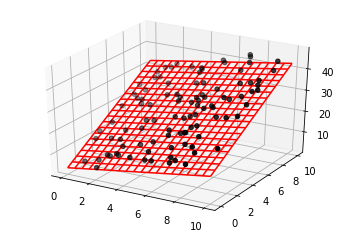

In [16]:
n = 100
scale = 10

np.random.seed(0)
X = np.random.random((n, 2)) * scale
w0 = 1
w1 = 2
w2 = 3
y = w0 + w1 * X[:, 0] + w2 * X[:, 1] + np.random.randn(n)

model.fit(X, y)

xmesh, ymesh = np.meshgrid(np.linspace(0, scale, 20), np.linspace(0, scalse, 20))
zmesh = (model.w_[0] + model.w_[1] + xmesh.ravel() +
         model.w_[2] * ymesh.ravel()).reshape(xmesh.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='k')
ax.plot_wireframe(xmesh, ymesh, zmesh, color='r')
plt.show()